# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph
from metrics import pearson, Pearson
from models import CNN
from utils import prepare_data, set_variables

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att1'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

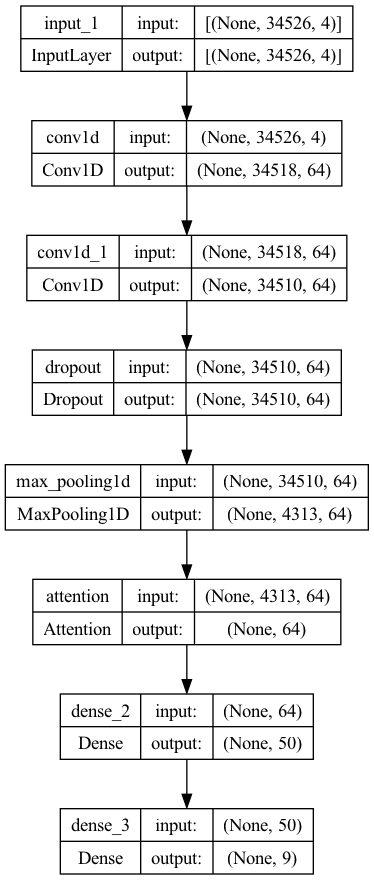

In [4]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34518, 64)         2304      
                                                                 
 conv1d_1 (Conv1D)           (None, 34510, 64)         36864     
                                                                 
 dropout (Dropout)           (None, 34510, 64)         0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 4313, 64)          0         
 D)                                                              
                                                                 
 attention (Attention)       (None, 64)                7920      
                                                             

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/2
311/311 [==============================] - 327s 1s/step - loss: 2.5213 - ERM: 0.1710 - KDEL: 0.2616 - LMA: 0.0120 - MITO: 0.1556 - NES: 0.0252 - NIK: 0.0318 - NLS: -0.0035 - NUCP: 0.0604 - OMM: 0.0199 - val_loss: 2.1780 - val_ERM: 0.2090 - val_KDEL: 0.2178 - val_LMA: -0.0642 - val_MITO: 0.1334 - val_NES: -0.1612 - val_NIK: 0.2639 - val_NLS: 0.0973 - val_NUCP: 0.0614 - val_OMM: -0.1009
Epoch 2/2
311/311 [==============================] - 331s 1s/step - loss: 3.1183 - ERM: 0.1675 - KDEL: 0.2881 - LMA: -0.0450 - MITO: 0.0029 - NES: -0.0084 - NIK: 0.1168 - NLS: 0.0028 - NUCP: 0.1101 - OMM: 0.0455 - val_loss: 2.1755 - val_ERM: 0.0765 - val_KDEL: 0.2447 - val_LMA: -0.4409 - val_MITO: -0.1643 - val_NES: 0.2673 - val_NIK: -0.0158 - val_NLS: -0.0426 - val_NUCP: 0.2234 - val_OMM: -0.0395


In [7]:
history.history

{'loss': [2.521343469619751, 3.118297815322876],
 'ERM': [0.29485926032066345, 0.0013589896261692047],
 'KDEL': [0.1215478777885437, 0.3740525543689728],
 'LMA': [0.2607085704803467, -0.17214658856391907],
 'MITO': [0.12569758296012878, -0.1553465723991394],
 'NES': [0.08643962442874908, -0.13126368820667267],
 'NIK': [-0.057711079716682434, 0.32940584421157837],
 'NLS': [0.2802029252052307, -0.08904407173395157],
 'NUCP': [-0.018698304891586304, -0.06274402141571045],
 'OMM': [0.2912716865539551, 0.10542646795511246],
 'val_loss': [2.178037405014038, 2.1754868030548096],
 'val_ERM': [0.2089821696281433, 0.07650810480117798],
 'val_KDEL': [0.21784242987632751, 0.2446676641702652],
 'val_LMA': [-0.06422370672225952, -0.4409305155277252],
 'val_MITO': [0.13336804509162903, -0.16425609588623047],
 'val_NES': [-0.16119834780693054, 0.2673128843307495],
 'val_NIK': [0.2639417350292206, -0.015755904838442802],
 'val_NLS': [0.09727014601230621, -0.042558956891298294],
 'val_NUCP': [0.06144359

<Axes: xlabel='epoch', ylabel='correlation'>

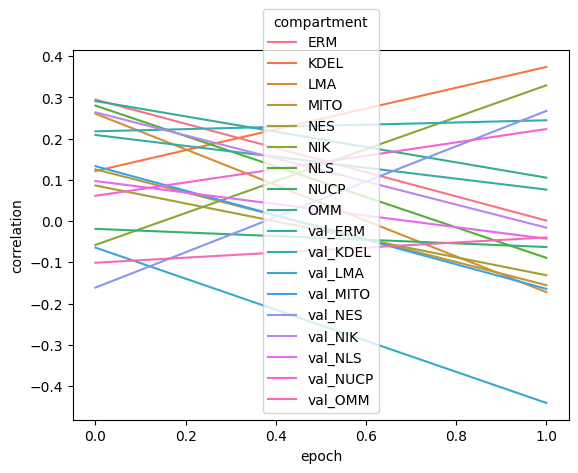

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

def multiplot_pearson(data, title: str = 'Correlation after Compartment'):
    headers = ['ERM', 'KDEL', 'LMA', 'MITO', 'NES', 'NIK', 'NLS', 'NUCP', 'OMM', 
               'val_ERM', 'val_KDEL', 'val_LMA', 'val_MITO', 'val_NES', 'val_NIK', 'val_NLS', 'val_NUCP', 'val_OMM'
               ]
    data_list = [data[ind] for ind in headers]
    data_list.append(list(range(len(data['loss']))))
    data_panda = np.array(data_list).transpose()
    headers.append('epoch')
    dataframe = pd.DataFrame(data_panda, columns=headers)
    plot_data = dataframe.melt(id_vars=['epoch'], var_name='compartment', value_name='correlation')
    return sns.lineplot(plot_data, x='epoch', y='correlation', hue='compartment')
    
multiplot_pearson(history.history)

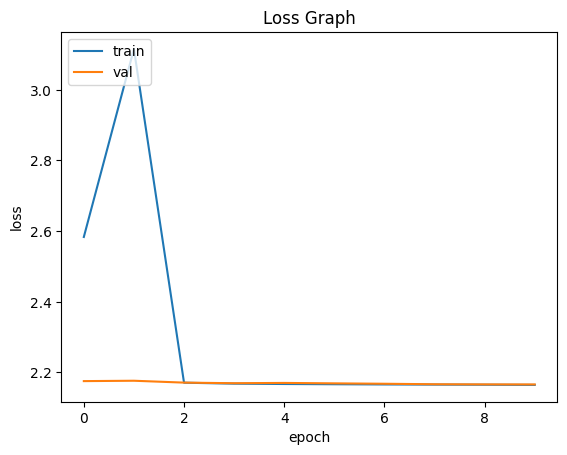

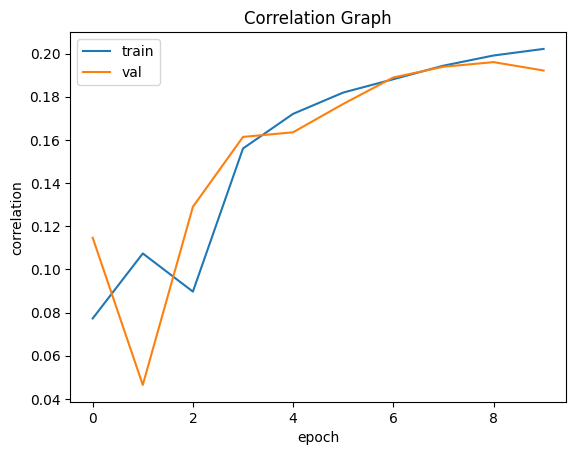

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

plt_data = [history.history['pearson'], history.history['val_pearson']]
plot_line_graph(plt_data, "Correlation Graph", 'correlation', 'epoch', ['train', 'val'])

In [8]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)

NotImplementedError: 
Layer Attention was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config